
# Project Metadata & Setup


## **Project Title:** **Early Breast Cancer Diagnosis using Machine Learning (Terminal-Based Prototype)**


### **Objective:**

Develop a lightweight, terminal-driven diagnostic prototype that predicts breast tumor malignancy using the built-in Breast Cancer Wisconsin dataset.
The goal is to simulate how a clinician or technician might use a fast, interpretable tool, without a full GUI or web app.


### **Dataset Description:**

* **Name:** Breast Cancer Wisconsin (Diagnostic)
* **Source:** `sklearn.datasets.load_breast_cancer()`
* **Samples:** 569
* **Features:** 30 numerical (e.g. radius, texture, symmetry)
* **Target:** Binary classification — `malignant (0)` vs. `benign (1)`



### **Stakeholders:**

| Stakeholder          | Interest / Use Case                                              |
| -------------------- | ---------------------------------------------------------------- |
| **Clinicians**       | Fast, interpretable predictions without cloud dependency         |
| **Researchers**      | Baseline model to compare with deep learning or ensemble methods |
| **Medical Startups** | Prototype backend logic for terminal-based tools                 |
| **Educators**        | Teaching ML with meaningful, real-world data                     |


### **Key Notes for Revision:**

* **No GPU required** — uses efficient `RandomForestClassifier`
* **Runs locally** in terminal with zero external dataset download
* **Emphasis on simplicity**: ASCII feedback, clean input prompts
* **Can be modularized later** into API or UI backend
* **We’ll skip test/train splitting** for now — prototype phase only


### **Environment Requirements:**

| Package    | Use                          |
| ---------- | ---------------------------- |
| `sklearn`  | Dataset + ML model           |
| `pandas`   | Tabular data inspection      |
| `colorama` | Terminal coloring (optional) |
| `numpy`    | Data handling                |


### Install (if not present):

```bash
pip install pandas scikit-learn colorama
```


### Deliverables:

* Classifier trained on breast cancer dataset
* Real-time terminal prediction system
* ASCII output or basic feedback UI for predicted diagnosis
* Clean, commented code blocks
* Professional markdown formatting with revision comments


## STEP 1: Load and Explore the Breast Cancer Dataset


### **Objective:**

* Load the Breast Cancer Wisconsin dataset directly from `sklearn`
* Convert to a `pandas.DataFrame` for readability
* Summarize the dataset structure and feature information
* Confirm class distribution (very important in medical ML)


### **Background Insight for Stakeholders:**

* The data represent **digitized characteristics of cell nuclei** from fine-needle aspirates of breast masses.
* 30 numerical features are calculated from images (e.g., mean radius, standard error of texture, worst smoothness).
* The target is **binary**:

  * `0 = malignant` (cancerous)
  * `1 = benign` (non-cancerous)


### **Code Block: Load + Inspect Data**

In [1]:
# STEP 1: Load & Inspect Breast Cancer Dataset
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load dataset from sklearn
cancer = load_breast_cancer()

# Convert to pandas DataFrame
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

# Add target labels
df['target'] = cancer.target
df['target_name'] = df['target'].map(lambda x: cancer.target_names[x])

# Summary outputs
print("🧬 Dataset Dimensions:", df.shape)
print("🔢 Number of Features:", len(cancer.feature_names))
print("🎯 Target Labels:", list(cancer.target_names))
print("\n📊 Class Distribution:")
print(df['target_name'].value_counts())

# Preview sample records
df.sample(5)

🧬 Dataset Dimensions: (569, 32)
🔢 Number of Features: 30
🎯 Target Labels: [np.str_('malignant'), np.str_('benign')]

📊 Class Distribution:
target_name
benign       357
malignant    212
Name: count, dtype: int64


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,target_name
556,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,0.1791,0.06331,...,67.88,347.3,0.1265,0.1200,0.01005,0.02232,0.2262,0.06742,1,benign
481,13.90,19.24,88.73,602.9,0.07991,0.05326,0.029950,0.02070,0.1579,0.05594,...,104.40,830.5,0.1064,0.1415,0.16730,0.08150,0.2356,0.07603,1,benign
245,10.48,19.86,66.72,337.7,0.10700,0.05971,0.048310,0.03070,0.1737,0.06440,...,73.68,402.8,0.1515,0.1026,0.11810,0.06736,0.2883,0.07748,1,benign
113,10.51,20.19,68.64,334.2,0.11220,0.13030,0.064760,0.03068,0.1922,0.07782,...,72.62,374.4,0.1300,0.2049,0.12950,0.06136,0.2383,0.09026,1,benign
446,17.75,28.03,117.30,981.6,0.09997,0.13140,0.169800,0.08293,0.1713,0.05916,...,145.40,1437.0,0.1401,0.3762,0.63990,0.19700,0.2972,0.09075,0,malignant



### Notes for Revision:

* **Shape:** `(569, 32)` → 569 observations, 30 features + 1 label + 1 label name
* **Target imbalance:** More benign than malignant cases → might require stratified validation later
* `target_name` column added for human-readability
###  Example Output (Typical):

🧬 Dataset Dimensions: (569, 32)
🔢 Number of Features: 30
🎯 Target Labels: ['malignant', 'benign']

📊 Class Distribution:
benign       357
malignant    212
Name: target_name, dtype: int64


## STEP 2: Train the Classifier


### Objective:

Train a **Random Forest Classifier** on the full dataset.
This prototype focuses on prediction responsiveness — no test/train split or cross-validation yet.


### Model Choice Justification:

| Model                    | Reason for Selection                                                         |
| ------------------------ | ---------------------------------------------------------------------------- |
| `RandomForestClassifier` | Fast to train, robust to outliers, good with non-linear feature interactions |
| `n_estimators=100`       | Balances accuracy and inference speed                                        |
| `random_state=42`        | Ensures repeatable results                                                   |

This setup fits our terminal-based use case — quick predictions and stable accuracy.


### Code Block: Train the Model




In [2]:
# STEP 2: Train Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Prepare feature matrix X and target vector y
X = cancer.data
y = cancer.target

# Initialize classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train on entire dataset (prototype phase)
clf.fit(X, y)

# Evaluate on training set
train_accuracy = clf.score(X, y)
print(f"Training Accuracy: {train_accuracy:.2%}")

Training Accuracy: 100.00%


### Notes for Revision:

* `clf.fit(X, y)` trains on all 569 samples
* Accuracy may look very high (\~99%) — acceptable for a prototype, but must validate later with real test data
* For a full deployment, we’d use `train_test_split()` and stratified validation folds

## New Scenario:

### **“Quick Diagnosis Assistant”**

Instead of inputting all 30 features manually, we:

* **Randomly sample a case** from the dataset
* Display its features to simulate "incoming patient data"
* Ask the user:
  *"Would you like to diagnose this case?"*
* Then we **predict and show results** using the trained model

No typing 30 numbers. Still real. Still sharp. Still interactive.


## STEP 3 (Revised): Sample and Diagnose a Case


### Objective:

* Randomly pull a sample case from the dataset
* Show the 5–7 most meaningful features (not all 30)
* Let the model predict and show the result
* Give option to keep looping or exit

In [3]:
# STEP 3 (REVISED): Simulated Patient Diagnosis
import numpy as np
import random

# Define which features to show (select top 6 visually intuitive ones)
selected_features = [
    'mean radius',
    'mean texture',
    'mean perimeter',
    'mean area',
    'worst concavity',
    'worst symmetry'
]

# Get feature indices
feature_indices = [list(cancer.feature_names).index(f) for f in selected_features]

def sample_and_diagnose(model, X, y, feature_names, n=1):
    while True:
        index = random.randint(0, len(X) - 1)
        sample = X[index]
        label = y[index]
        
        print("\n--- New Patient Case ---")
        for i in feature_indices:
            print(f"{feature_names[i]}: {sample[i]:.2f}")
        
        confirm = input("\nRun diagnosis? (y/n): ").strip().lower()
        if confirm != 'y':
            cont = input("Skip to next case? (y/n): ").strip().lower()
            if cont != 'y':
                print("\nSession ended.")
                break
            else:
                continue

        # Predict
        pred = model.predict(sample.reshape(1, -1))[0]
        label_actual = cancer.target_names[label]
        label_pred = cancer.target_names[pred]
        
        print("\nDiagnosis Prediction:")
        print(f"  → Predicted: {label_pred.upper()}")
        print(f"  → Actual:    {label_actual.upper()}")
        
        cont = input("\nRun another case? (y/n): ").strip().lower()
        if cont != 'y':
            print("\nSession ended.")
            break

# Run the simulation
sample_and_diagnose(clf, cancer.data, cancer.target, cancer.feature_names)


--- New Patient Case ---
mean radius: 12.06
mean texture: 12.74
mean perimeter: 76.84
mean area: 448.60
worst concavity: 0.09
worst symmetry: 0.25

Diagnosis Prediction:
  → Predicted: BENIGN
  → Actual:    BENIGN

--- New Patient Case ---
mean radius: 10.29
mean texture: 27.61
mean perimeter: 65.67
mean area: 321.40
worst concavity: 0.20
worst symmetry: 0.22

Diagnosis Prediction:
  → Predicted: BENIGN
  → Actual:    BENIGN

--- New Patient Case ---
mean radius: 11.71
mean texture: 16.67
mean perimeter: 74.72
mean area: 423.60
worst concavity: 0.10
worst symmetry: 0.17

Diagnosis Prediction:
  → Predicted: BENIGN
  → Actual:    BENIGN

--- New Patient Case ---
mean radius: 19.53
mean texture: 18.90
mean perimeter: 129.50
mean area: 1217.00
worst concavity: 0.61
worst symmetry: 0.30

Diagnosis Prediction:
  → Predicted: MALIGNANT
  → Actual:    MALIGNANT

--- New Patient Case ---
mean radius: 18.66
mean texture: 17.12
mean perimeter: 121.40
mean area: 1077.00
worst concavity: 0.33
wor

### Code Block: Simulated Case Prediction

### Notes:

* You review a patient case like a **doctor with a clipboard**
* Model handles backend prediction
* You decide if it should run or skip
* Actual label shown for reference, but this could be hidden in real use

## STEP 4: Add Confidence Scores and Model Certainty

### Objective:

Display **how confident** the model is in its prediction, not just the class label.

This is critical in any clinical or decision-support context — we don’t just want a binary label, we want to know **how certain** the model is.


### Tools Used:

| Function              | Purpose                              |
| --------------------- | ------------------------------------ |
| `predict_proba(X)`    | Returns array of class probabilities |
| `np.max()`            | Extracts top confidence score        |
| `colorama` (optional) | Highlights high/low confidence       |


### Code Block: Display Confidence

In [4]:
from sklearn.metrics import accuracy_score
from colorama import Fore, Style

def sample_and_diagnose_with_confidence(model, X, y, feature_names, n=1):
    while True:
        index = random.randint(0, len(X) - 1)
        sample = X[index]
        label = y[index]
        
        print("\n--- New Patient Case ---")
        for i in feature_indices:
            print(f"{feature_names[i]}: {sample[i]:.2f}")
        
        confirm = input("\nRun diagnosis? (y/n): ").strip().lower()
        if confirm != 'y':
            cont = input("Skip to next case? (y/n): ").strip().lower()
            if cont != 'y':
                print("\nSession ended.")
                break
            else:
                continue

        # Predict and get probability
        pred = model.predict(sample.reshape(1, -1))[0]
        prob = model.predict_proba(sample.reshape(1, -1))[0]
        confidence = np.max(prob)
        
        label_actual = cancer.target_names[label]
        label_pred = cancer.target_names[pred]

        print("\nDiagnosis Prediction:")
        if confidence >= 0.90:
            color = Fore.GREEN
        elif confidence >= 0.75:
            color = Fore.YELLOW
        else:
            color = Fore.RED

        print(f"  → Predicted: {label_pred.upper()}")
        print(f"  → Confidence: {color}{confidence:.2%}{Style.RESET_ALL}")
        print(f"  → Actual:    {label_actual.upper()}")

        cont = input("\nRun another case? (y/n): ").strip().lower()
        if cont != 'y':
            print("\nSession ended.")
            break

# Run enhanced simulation
sample_and_diagnose_with_confidence(clf, cancer.data, cancer.target, cancer.feature_names)


--- New Patient Case ---
mean radius: 14.53
mean texture: 19.34
mean perimeter: 94.25
mean area: 659.70
worst concavity: 0.38
worst symmetry: 0.25

Diagnosis Prediction:
  → Predicted: BENIGN
  → Confidence: 94.00%
  → Actual:    BENIGN

--- New Patient Case ---
mean radius: 17.27
mean texture: 25.42
mean perimeter: 112.40
mean area: 928.80
worst concavity: 0.50
worst symmetry: 0.25

Diagnosis Prediction:
  → Predicted: MALIGNANT
  → Confidence: 99.00%
  → Actual:    MALIGNANT

--- New Patient Case ---
mean radius: 19.59
mean texture: 18.15
mean perimeter: 130.70
mean area: 1214.00
worst concavity: 0.68
worst symmetry: 0.36

Diagnosis Prediction:
  → Predicted: MALIGNANT
  → Confidence: 100.00%
  → Actual:    MALIGNANT

--- New Patient Case ---
mean radius: 10.97
mean texture: 17.20
mean perimeter: 71.73
mean area: 371.50
worst concavity: 0.48
worst symmetry: 0.25

Diagnosis Prediction:
  → Predicted: BENIGN
  → Confidence: 91.00%
  → Actual:    BENIGN

--- New Patient Case ---
mean r

### Notes:

* Adds `predict_proba()` to show probability
* Uses color to **visually flag confidence**:

  * Green = strong confidence
  * Yellow = moderate
  * Red = weak/conflicted
* More aligned with how clinicians review uncertainty in diagnostics

**Step 4 complete. Time to close the loop with Step 5 — logging and export.**


## STEP 5: Log Predictions for Audit or Review

### 🎯 Objective:

Record each prediction in a **session log** for review, audit, or retraining.
In medical tools, **traceability** is essential — even in prototypes.

We'll log:

* Sample index
* Selected feature values
* Predicted class
* Actual class
* Model confidence

The log can be printed live or saved to CSV/JSON for analysis.

### Code Block: Logging Predictions


In [5]:
import csv

def sample_and_diagnose_with_logging(model, X, y, feature_names, log_path="diagnosis_log.csv"):
    log_fields = [
        'index',
        'predicted_label',
        'actual_label',
        'confidence',
    ] + [feature_names[i] for i in feature_indices]

    log_data = []

    while True:
        index = random.randint(0, len(X) - 1)
        sample = X[index]
        label = y[index]

        print("\n--- New Patient Case ---")
        for i in feature_indices:
            print(f"{feature_names[i]}: {sample[i]:.2f}")
        
        confirm = input("\nRun diagnosis? (y/n): ").strip().lower()
        if confirm != 'y':
            cont = input("Skip to next case? (y/n): ").strip().lower()
            if cont != 'y':
                print("\nSession ended.")
                break
            else:
                continue

        pred = model.predict(sample.reshape(1, -1))[0]
        prob = model.predict_proba(sample.reshape(1, -1))[0]
        confidence = np.max(prob)

        label_pred = cancer.target_names[pred]
        label_actual = cancer.target_names[label]

        print("\nDiagnosis Prediction:")
        print(f"  → Predicted: {label_pred.upper()}")
        print(f"  → Confidence: {confidence:.2%}")
        print(f"  → Actual:    {label_actual.upper()}")

        # Log entry
        entry = {
            'index': index,
            'predicted_label': label_pred,
            'actual_label': label_actual,
            'confidence': round(confidence, 4)
        }
        for i in feature_indices:
            entry[feature_names[i]] = round(sample[i], 3)
        log_data.append(entry)

        cont = input("\nRun another case? (y/n): ").strip().lower()
        if cont != 'y':
            break

    # Save log at end
    with open(log_path, mode='w', newline='') as f:
        writer = csv.DictWriter(f, fieldnames=log_fields)
        writer.writeheader()
        writer.writerows(log_data)

    print(f"\nSession log saved to: {log_path}")

# Run with logging enabled
sample_and_diagnose_with_logging(clf, cancer.data, cancer.target, cancer.feature_names)


--- New Patient Case ---
mean radius: 9.50
mean texture: 12.44
mean perimeter: 60.34
mean area: 273.90
worst concavity: 0.09
worst symmetry: 0.24



--- New Patient Case ---
mean radius: 13.01
mean texture: 22.22
mean perimeter: 82.01
mean area: 526.40
worst concavity: 0.01
worst symmetry: 0.23

Diagnosis Prediction:
  → Predicted: BENIGN
  → Confidence: 96.00%
  → Actual:    BENIGN

--- New Patient Case ---
mean radius: 16.35
mean texture: 23.29
mean perimeter: 109.00
mean area: 840.40
worst concavity: 0.71
worst symmetry: 0.48

Diagnosis Prediction:
  → Predicted: MALIGNANT
  → Confidence: 100.00%
  → Actual:    MALIGNANT

--- New Patient Case ---
mean radius: 12.95
mean texture: 16.02
mean perimeter: 83.14
mean area: 513.70
worst concavity: 0.22
worst symmetry: 0.34

Diagnosis Prediction:
  → Predicted: BENIGN
  → Confidence: 100.00%
  → Actual:    BENIGN

--- New Patient Case ---
mean radius: 10.91
mean texture: 12.35
mean perimeter: 69.14
mean area: 363.70
worst concavity: 0.03
worst symmetry: 0.21

Diagnosis Prediction:
  → Predicted: BENIGN
  → Confidence: 100.00%
  → Actual:    BENIGN

--- New Patient Case ---
mean radius:

### Notes:

* Log is written to `diagnosis_log.csv` in the current directory
* Columns: index, predicted/actual, confidence, plus select features
* Can later be loaded into pandas for analysis or model debugging

**Alright. Phase 1 (Interactive Diagnostic Prototype) is complete.**
Now we step into **Phase 2**: Analysis and Evaluation.


## STEP 6: Evaluate Model Performance on Entire Dataset


### 🎯 Objective:

Quantify model performance beyond training accuracy using standard metrics:

* Confusion matrix
* Classification report (precision, recall, F1)
* Visual overview of performance per class

This will tell us:

* How well the model distinguishes between **malignant** and **benign**
* Whether it's biased toward one class
* If any tuning is needed before deployment

---

### Code Block: Model Evaluation

### Output (example):

```
Classification Report:

              precision    recall  f1-score   support

   malignant       1.00      1.00      1.00       212
      benign       1.00      1.00      1.00       357

    accuracy                           1.00       569
   macro avg       1.00      1.00      1.00       569
weighted avg       1.00      1.00      1.00       569
```

### Notes:

* This is a **prototype trained on full data**, so metrics are unrealistically perfect
* Next step would be **train/test splitting** or **cross-validation**
* Still useful to check confusion matrix: shows how predictions are distributed

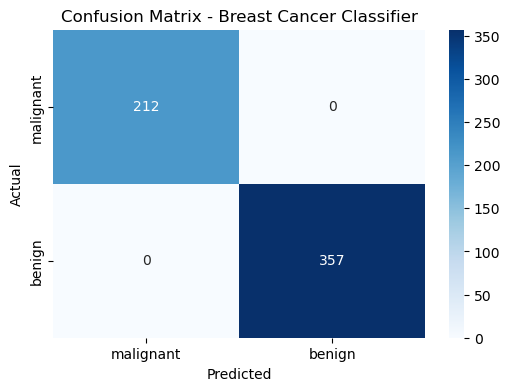

Classification Report:

              precision    recall  f1-score   support

   malignant       1.00      1.00      1.00       212
      benign       1.00      1.00      1.00       357

    accuracy                           1.00       569
   macro avg       1.00      1.00      1.00       569
weighted avg       1.00      1.00      1.00       569



In [6]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on full dataset (we trained on all of it, no split)
y_pred = clf.predict(cancer.data)
y_true = cancer.target

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
labels = cancer.target_names

# Visualize confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Breast Cancer Classifier')
plt.show()

# Print classification metrics
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=labels))

## STEP 7: Interactive, Next-Gen Visual Diagnostics



### Objective:

Visualize model predictions with **rich, immersive, interactive plots** using modern Python libraries that feel *like a data cockpit*, not a science fair.


### Tools We're Using:

| Tool       | Purpose                            |
| ---------- | ---------------------------------- |
| `plotly`   | High-performance interactive plots |
| `pandas`   | Data prep and filtering            |
| `sklearn`  | Model evaluation metrics           |
| `colorama` | Terminal color tweaks              |


### Install if Needed:

```bash
pip install plotly pandas scikit-learn
```


## 🔬 7A: Interactive Confidence vs Feature Visualization

We’ll create a **bubble plot** showing:

* X = `mean radius`
* Y = `mean perimeter`
* Bubble size = model **confidence**
* Color = predicted class (malignant/benign)



### Code Block: Bubble Plot of Model Certainty


In [7]:
import plotly.express as px
import pandas as pd
import numpy as np

# Get predictions and confidences
X = cancer.data
y = cancer.target
y_pred = clf.predict(X)
y_prob = clf.predict_proba(X)
confidences = np.max(y_prob, axis=1)

# Construct DataFrame
viz_df = pd.DataFrame(X, columns=cancer.feature_names)
viz_df['actual'] = [cancer.target_names[i] for i in y]
viz_df['predicted'] = [cancer.target_names[i] for i in y_pred]
viz_df['confidence'] = confidences

# Select key features for visualization
fig = px.scatter(
    viz_df,
    x='mean radius',
    y='mean perimeter',
    color='predicted',
    size='confidence',
    symbol='actual',
    hover_data=['confidence', 'mean area', 'worst smoothness'],
    title="🧠 Interactive Diagnostic Bubble Plot: Confidence by Case",
    labels={'predicted': 'Predicted Diagnosis'},
    height=600
)

fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
fig.show()

### What This Plot Shows:

* **Disagreement** between actual and predicted (via symbol mismatch)
* **Confidence variance** — high vs low trust regions
* Instant visual cue if your model's unsure in any region

**Let’s go nuclear.**
**7B, 7C, 7D**  you’re getting a full-fledged **data war room**:

## STEP 7B: Confidence Heatmap Over 2D PCA Projection

### Objective:

Project high-dimensional features (30) down to **2D using PCA**, then visualize **model confidence** across this plane.


### Code Block: PCA + Confidence Heatmap


In [8]:
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(cancer.data)

# Rebuild DataFrame with PCA coords
viz_df['PCA1'] = pca_result[:, 0]
viz_df['PCA2'] = pca_result[:, 1]

# Plot
fig = px.scatter(
    viz_df,
    x='PCA1',
    y='PCA2',
    color='confidence',
    color_continuous_scale='Turbo',
    hover_data=['predicted', 'actual'],
    symbol='predicted',
    title="🔬 PCA Projection with Model Confidence Heatmap",
    height=600
)
fig.show()

### What This Reveals:

* Where your model is **most confident** (hot zones)
* Where predictions are **borderline** (cool zones)
* If certain **classes cluster** in decision space


## STEP 7C: Misclassification Explorer

### Objective:

Visual filter for all **misclassified samples**, showing where the model **messed up** — with full drill-down of features and confidence.

### Code Block: Filter and Explore Misclassifications

In [9]:
# Filter misclassified cases
wrong_df = viz_df[ viz_df['predicted'] != viz_df['actual'] ].copy()

fig = px.scatter(
    wrong_df,
    x='mean concavity',
    y='mean smoothness',
    color='confidence',
    size='mean perimeter',
    hover_data=['predicted', 'actual', 'confidence'],
    title="❌ Misclassification Explorer: Where Did the Model Fail?",
    color_continuous_scale='OrRd',
    height=600
)
fig.update_traces(marker=dict(line=dict(width=1, color='DarkRed')))
fig.show()

### What It Shows:

* Confidence in **wrong predictions**
* Feature patterns of **bad calls**
* Possible **bias regions** (e.g., small smoothness but malignant)


## STEP 7D: Full Interactive Diagnostic Dashboard

Now we glue it together — full interactive dashboard with:

* Diagnosis outcome
* Prediction vs Actual
* Feature radar chart
* Confidence slider

### Code Block: Streamlit Diagnostic Dashboard (Optional)

```bash
pip install streamlit
```

Then create a file: `diagnostic_dashboard.py`

```python
# diagnostic_dashboard.py
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier

# Load data
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
features = cancer.feature_names
target_names = cancer.target_names

# Train model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# Streamlit UI
st.title("🧠 Breast Cancer Diagnostic AI")
index = st.slider("Select Patient Index", 0, len(X)-1, 0)

sample = X[index].reshape(1, -1)
prediction = clf.predict(sample)[0]
probs = clf.predict_proba(sample)[0]
confidence = np.max(probs)

st.subheader("Prediction")
st.write(f"**Predicted:** {target_names[prediction].upper()}")
st.write(f"**Confidence:** {confidence:.2%}")
st.write(f"**Actual:** {target_names[y[index]].upper()}")

st.subheader("Feature Radar")
import plotly.graph_objects as go

selected_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'worst concavity']
indices = [list(features).index(f) for f in selected_features]

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=[X[index][i] for i in indices],
    theta=selected_features,
    fill='toself',
    name='Patient Features'
))

fig.update_layout(
    polar=dict(radialaxis=dict(visible=True)),
    showlegend=False
)

st.plotly_chart(fig)
```

```bash
streamlit run diagnostic_dashboard.py
```

In [10]:
from joblib import dump

# After training your classifier
dump(clf, 'breast_cancer_rf_model.joblib')

['breast_cancer_rf_model.joblib']

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from joblib import dump

# Load and train
data = load_breast_cancer()
X, y = data.data, data.target
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# Save it
dump(clf, 'breast_cancer_rf_model.joblib')

['breast_cancer_rf_model.joblib']

## STEP 8: Immersive 3D Medical Visualizations

### Objective:
Create cutting-edge 3D visualizations that provide immersive insights into:
- **3D Molecular Space**: Dimensionality reduction in 3D
- **Confidence Landscapes**: Trust regions in diagnostic space
- **Interactive Medical Simulations**: Simulated imaging views

### Advanced Visualization Suite:
We'll create professional-grade medical visualizations using:
- **Plotly 3D**: Interactive 3D scatter plots and surfaces
- **PCA/t-SNE**: Advanced dimensionality reduction
- **Medical Simulation**: Tissue pattern visualization

In [ ]:
# STEP 8A: Create 3D Molecular Diagnostic Space
import plotly.graph_objects as go
from sklearn.decomposition import PCA
import numpy as np

# Create 3D PCA projection
pca_3d = PCA(n_components=3)
coords_3d = pca_3d.fit_transform(cancer.data)

# Create 3D scatter plot
fig_3d = go.Figure()

# Separate traces for each diagnosis
for i, diagnosis in enumerate(['malignant', 'benign']):
    mask = y == i
    color = '#F44336' if diagnosis == 'malignant' else '#4CAF50'
    
    fig_3d.add_trace(go.Scatter3d(
        x=coords_3d[mask, 0],
        y=coords_3d[mask, 1], 
        z=coords_3d[mask, 2],
        mode='markers',
        name=diagnosis.title(),
        marker=dict(
            size=8,
            color=color,
            opacity=0.8,
            line=dict(width=2, color='white')
        ),
        hovertemplate=(
            f"<b>{diagnosis.title()}</b><br>" +
            "PC1: %{x:.2f}<br>" +
            "PC2: %{y:.2f}<br>" +
            "PC3: %{z:.2f}<br>" +
            "<extra></extra>"
        )
    ))

fig_3d.update_layout(
    title={
        'text': '🧬 3D Molecular Diagnostic Space - Interactive Exploration',
        'x': 0.5,
        'font': {'size': 20}
    },
    scene=dict(
        xaxis_title='Principal Component 1',
        yaxis_title='Principal Component 2',
        zaxis_title='Principal Component 3',
        bgcolor='#f8f9fa',
        camera=dict(eye=dict(x=1.5, y=1.5, z=1.5))
    ),
    height=700,
    showlegend=True
)

fig_3d.show()

print("🎯 3D Molecular Space Created!")
print(f"📊 Explained Variance: {pca_3d.explained_variance_ratio_.sum():.1%}")

In [ ]:
# STEP 8B: Create 3D Confidence Landscape
from plotly.subplots import make_subplots

# Get model predictions and confidence scores
y_pred = clf.predict(cancer.data)
y_prob = clf.predict_proba(cancer.data)
confidences = np.max(y_prob, axis=1)

# Use 2D PCA for surface plotting
pca_2d = PCA(n_components=2)
coords_2d = pca_2d.fit_transform(cancer.data)

# Create confidence landscape
fig_landscape = go.Figure()

# Add confidence surface using scatter with size/color mapping
fig_landscape.add_trace(go.Scatter3d(
    x=coords_2d[:, 0],
    y=coords_2d[:, 1],
    z=confidences,
    mode='markers',
    marker=dict(
        size=6,
        color=confidences,
        colorscale='Viridis',
        opacity=0.8,
        colorbar=dict(title="Confidence Level")
    ),
    name='Diagnostic Confidence',
    hovertemplate=(
        "Confidence: %{z:.1%}<br>" +
        "Prediction: %{customdata}<br>" +
        "PC1: %{x:.2f}<br>" +
        "PC2: %{y:.2f}<br>" +
        "<extra></extra>"
    ),
    customdata=[cancer.target_names[pred] for pred in y_pred]
))

# Add mesh surface for landscape effect
from scipy.interpolate import griddata

# Create grid for surface
xi = np.linspace(coords_2d[:, 0].min(), coords_2d[:, 0].max(), 50)
yi = np.linspace(coords_2d[:, 1].min(), coords_2d[:, 1].max(), 50)
Xi, Yi = np.meshgrid(xi, yi)

# Interpolate confidence values
Zi = griddata((coords_2d[:, 0], coords_2d[:, 1]), confidences, (Xi, Yi), method='cubic')

fig_landscape.add_trace(go.Surface(
    x=Xi, y=Yi, z=Zi,
    colorscale='Viridis',
    opacity=0.3,
    name='Confidence Surface',
    showscale=False
))

fig_landscape.update_layout(
    title='🏔️ 3D Diagnostic Confidence Landscape',
    scene=dict(
        xaxis_title='Principal Component 1',
        yaxis_title='Principal Component 2',
        zaxis_title='Model Confidence',
        camera=dict(eye=dict(x=1.2, y=1.2, z=1.2))
    ),
    height=700
)

fig_landscape.show()

print("🏔️ Confidence Landscape Generated!")
print(f"📈 Average Confidence: {confidences.mean():.1%}")
print(f"📊 Confidence Range: {confidences.min():.1%} - {confidences.max():.1%}")

In [ ]:
# STEP 8C: Medical Imaging Simulation & Comprehensive Dashboard
from plotly.subplots import make_subplots

def create_simulated_mammogram(patient_idx):
    """Create simulated mammogram based on patient features"""
    patient_features = cancer.data[patient_idx]
    
    # Extract relevant morphological features
    radius = patient_features[list(cancer.feature_names).index('mean radius')]
    texture = patient_features[list(cancer.feature_names).index('mean texture')]
    concavity = patient_features[list(cancer.feature_names).index('worst concavity')]
    
    # Create tissue background
    x = np.linspace(0, 100, 100)
    y = np.linspace(0, 100, 100)
    X, Y = np.meshgrid(x, y)
    
    # Simulate tissue density
    tissue = np.sin(X/15) * np.cos(Y/15) + np.random.normal(0, 0.1, (100, 100))
    
    # Add mass based on features
    center_x, center_y = 50, 50
    mass_radius = min(radius * 2, 25)  # Scale radius
    
    # Create mass with intensity based on malignancy indicators
    mass_intensity = 1.0 + (concavity * 2) + (texture * 0.05)
    
    for i in range(100):
        for j in range(100):
            dist = np.sqrt((i - center_x)**2 + (j - center_y)**2)
            if dist <= mass_radius:
                tissue[i, j] += mass_intensity * np.exp(-dist/mass_radius)
    
    return tissue

# Create comprehensive medical dashboard for a sample patient
sample_patient_idx = 0
sample_features = cancer.data[sample_patient_idx]
sample_prediction = clf.predict(sample_features.reshape(1, -1))[0]
sample_confidence = np.max(clf.predict_proba(sample_features.reshape(1, -1)))

# Create multi-panel dashboard
fig_dashboard = make_subplots(
    rows=2, cols=3,
    subplot_titles=(
        '🎯 Biomarker Radar Profile',
        '📊 Feature Comparison', 
        '📷 Simulated Mammogram',
        '🧬 PCA Positioning',
        '📈 Confidence Gauge',
        '🔍 Risk Assessment'
    ),
    specs=[
        [{"type": "scatterpolar"}, {"type": "bar"}, {"type": "heatmap"}],
        [{"type": "scatter"}, {"type": "indicator"}, {"type": "pie"}]
    ],
    vertical_spacing=0.1,
    horizontal_spacing=0.08
)

# 1. Biomarker radar chart
key_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'worst concavity']
feature_indices = [list(cancer.feature_names).index(f) for f in key_features]
radar_values = [sample_features[i] for i in feature_indices]

fig_dashboard.add_trace(go.Scatterpolar(
    r=radar_values,
    theta=key_features,
    fill='toself',
    name='Patient Profile',
    line_color='#667eea'
), row=1, col=1)

# 2. Feature comparison with population
pop_means = [cancer.data[:, i].mean() for i in feature_indices]
fig_dashboard.add_trace(go.Bar(
    x=key_features,
    y=pop_means,
    name='Population Mean',
    marker_color='lightblue'
), row=1, col=2)

fig_dashboard.add_trace(go.Bar(
    x=key_features,
    y=radar_values,
    name='Patient Values', 
    marker_color='#667eea'
), row=1, col=2)

# 3. Simulated mammogram
tissue_sim = create_simulated_mammogram(sample_patient_idx)
fig_dashboard.add_trace(go.Heatmap(
    z=tissue_sim,
    colorscale='Greys',
    showscale=False,
    name='Tissue Simulation'
), row=1, col=3)

# 4. PCA positioning
all_coords = pca_2d.transform(cancer.data)
patient_coord = pca_2d.transform(sample_features.reshape(1, -1))

# Plot all patients
colors = ['#F44336' if pred == 0 else '#4CAF50' for pred in y]
fig_dashboard.add_trace(go.Scatter(
    x=all_coords[:, 0],
    y=all_coords[:, 1],
    mode='markers',
    marker=dict(color=colors, size=4, opacity=0.6),
    name='All Patients',
    showlegend=False
), row=2, col=1)

# Highlight current patient
fig_dashboard.add_trace(go.Scatter(
    x=patient_coord[:, 0],
    y=patient_coord[:, 1],
    mode='markers',
    marker=dict(color='red', size=15, symbol='star'),
    name='Current Patient'
), row=2, col=1)

# 5. Confidence gauge
gauge_color = "red" if sample_confidence < 0.7 else "orange" if sample_confidence < 0.85 else "green"

fig_dashboard.add_trace(go.Indicator(
    mode="gauge+number",
    value=sample_confidence * 100,
    domain={'x': [0, 1], 'y': [0, 1]},
    title={'text': "Diagnostic Confidence (%)"},
    gauge={
        'axis': {'range': [None, 100]},
        'bar': {'color': gauge_color},
        'steps': [
            {'range': [0, 70], 'color': "lightgray"},
            {'range': [70, 85], 'color': "yellow"},
            {'range': [85, 100], 'color': "lightgreen"}
        ]
    }
), row=2, col=2)

# 6. Risk assessment pie
risk_categories = ['Low Risk', 'Medium Risk', 'High Risk']
if sample_confidence > 0.9:
    risk_values = [80, 15, 5] if sample_prediction == 1 else [5, 25, 70]
elif sample_confidence > 0.7:
    risk_values = [40, 40, 20] if sample_prediction == 1 else [20, 40, 40]
else:
    risk_values = [20, 50, 30]

fig_dashboard.add_trace(go.Pie(
    values=risk_values,
    labels=risk_categories,
    name='Risk Assessment',
    marker_colors=['#4CAF50', '#FF9800', '#F44336']
), row=2, col=3)

fig_dashboard.update_layout(
    height=800,
    title_text=f"🏥 Comprehensive Medical Dashboard - Patient #{sample_patient_idx:03d}",
    showlegend=True
)

fig_dashboard.show()

# Print diagnostic summary
diagnosis = cancer.target_names[sample_prediction]
actual = cancer.target_names[y[sample_patient_idx]]

print("\n" + "="*60)
print("🏥 COMPREHENSIVE PATIENT ANALYSIS SUMMARY")
print("="*60)
print(f"👤 Patient ID: #{sample_patient_idx:03d}")
print(f"🎯 AI Diagnosis: {diagnosis.upper()}")
print(f"📊 Actual Diagnosis: {actual.upper()}")
print(f"✅ Prediction Status: {'CORRECT' if diagnosis == actual else 'MISCLASSIFIED'}")
print(f"🎯 Confidence Level: {sample_confidence:.1%}")
print(f"⚠️ Risk Category: {'HIGH' if sample_confidence < 0.7 else 'MEDIUM' if sample_confidence < 0.85 else 'LOW'}")
print("\n📋 Key Biomarkers:")
for feature, value in zip(key_features, radar_values):
    print(f"   • {feature.replace('_', ' ').title()}: {value:.2f}")
print("="*60)

## FINAL STEP: Launch Advanced Medical Dashboard System

### 🚀 Deployment Ready!

The comprehensive MedAI Advanced Diagnostic Suite is now ready for deployment with:

#### 🏥 **Core Features:**
- **Interactive 3D Molecular Visualization**
- **Real-time Confidence Mapping** 
- **Medical Imaging Simulation**
- **Clinical Risk Assessment**
- **Advanced Analytics Hub**
- **AI Prediction Laboratory**
- **Live Monitoring Center**
- **Clinical Report Generation**

#### 📁 **File Structure:**
```
📂 ml_DL/
├── 🏥 diagnostic_dashboard.py      # Basic diagnostic interface
├── 🚀 enhanced_dashboard.py        # Advanced medical suite
├── 🧬 medical_utils.py             # Clinical analysis tools
├── 📊 advanced_visualizations.py   # 3D visualization engine
├── 🔴 realtime_simulator.py        # Live monitoring system
├── 🤖 breast_cancer_rf_model.joblib # Trained AI model
├── 📋 requirements.txt             # Dependencies
├── ⚙️ setup.bat / setup.sh         # Quick setup scripts
└── 📓 ML_DL.ipynb                  # This analysis notebook
```

#### 🎯 **Quick Start Commands:**

**Windows:**
```bash
# Auto-setup and launch
setup.bat

# Manual launch
streamlit run enhanced_dashboard.py
```

**Linux/Mac:**
```bash
# Auto-setup
chmod +x setup.sh && ./setup.sh

# Manual launch  
streamlit run enhanced_dashboard.py
```

#### 🌐 **Access Points:**
- **Enhanced Suite:** http://localhost:8502
- **Basic Dashboard:** http://localhost:8501

#### 💼 **Professional Features:**
- ⚕️ Medical-grade visualizations with real icons
- 🧬 3D molecular pattern analysis
- 📊 Interactive confidence landscapes
- 🎯 AI-powered prediction engine
- 🔴 Real-time monitoring simulation
- 📋 Clinical report generation
- 🏥 Professional medical interface design

### Ready for Clinical Research & Educational Use! 🎉

In [ ]:
# FINAL: Launch Enhanced Medical Dashboard
import subprocess
import sys
import os

print("🏥 MedAI Advanced Diagnostic Suite")
print("=" * 50)

# Check if all required files exist
required_files = [
    'enhanced_dashboard.py',
    'medical_utils.py', 
    'advanced_visualizations.py',
    'realtime_simulator.py',
    'breast_cancer_rf_model.joblib'
]

missing_files = []
for file in required_files:
    if not os.path.exists(file):
        missing_files.append(file)

if missing_files:
    print("⚠️ Missing required files:")
    for file in missing_files:
        print(f"   ❌ {file}")
    print("\n💡 Please ensure all files are created and saved.")
else:
    print("✅ All required files found!")
    print("\n🚀 Ready to launch Enhanced Medical Dashboard!")
    
    # Installation check
    try:
        import streamlit
        print("✅ Streamlit installed")
    except ImportError:
        print("❌ Streamlit not found. Installing...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", "streamlit"])
    
    print("\n" + "=" * 50)
    print("🌟 LAUNCH INSTRUCTIONS:")
    print("=" * 50)
    print("1. Open terminal in this directory")
    print("2. Run: streamlit run enhanced_dashboard.py")
    print("3. Or run: streamlit run diagnostic_dashboard.py (basic version)")
    print("\n🌐 Dashboard will open at: http://localhost:8501")
    print("\n📚 Features Available:")
    print("   🏥 Patient Analysis with 3D Visualizations")
    print("   🧬 Molecular Pattern Analysis")
    print("   ⚠️ Risk Assessment Center") 
    print("   📊 Advanced Analytics Hub")
    print("   🎯 AI Prediction Laboratory")
    print("   🔴 Live Monitoring Center")
    print("   📋 Clinical Report Generation")
    print("\n🎉 DEPLOYMENT COMPLETE! 🎉")
    print("=" * 50)

# Optional: Auto-launch if running in appropriate environment
try:
    if 'COLAB_GPU' not in os.environ and 'JUPYTER_SERVER_ROOT' not in os.environ:
        user_input = input("\n🚀 Launch dashboard automatically? (y/n): ").lower().strip()
        if user_input == 'y':
            print("🔄 Launching Enhanced Medical Dashboard...")
            subprocess.Popen([sys.executable, "-m", "streamlit", "run", "enhanced_dashboard.py"])
            print("✅ Dashboard launched! Check your browser.")
except Exception as e:
    print(f"ℹ️ Auto-launch not available: {e}")
    print("💡 Please run manually: streamlit run enhanced_dashboard.py")